In [54]:
import pandas as pd
import numpy as np

train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")

# logistic data ha man

print(test)
print(train)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

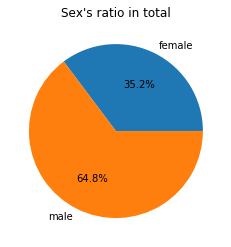

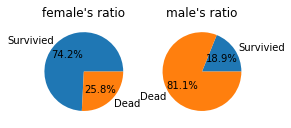

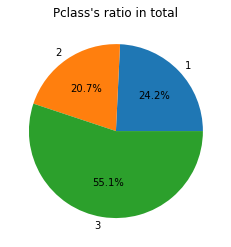

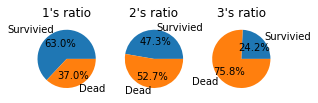

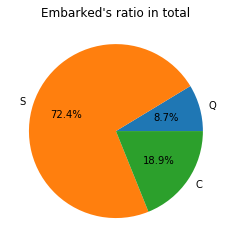

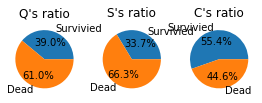

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#sns.set() # setting seaborn default for plots

## 파이 차트로 진짜 한번 어떤게 영향을 미치는지 한번 보자????
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort=False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts() 

    plt.plot(aspect='auto')
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
    plt.title(feature + '\'s ratio in total')
    plt.show()

    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
        plt.pie([survived[index], dead[index]], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
        plt.title(str(index) + '\'s ratio')

    plt.show()

pie_chart('Sex')
pie_chart('Pclass')

pie_chart('Embarked')

    


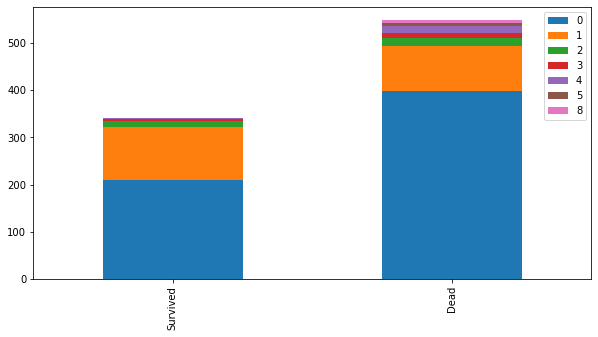

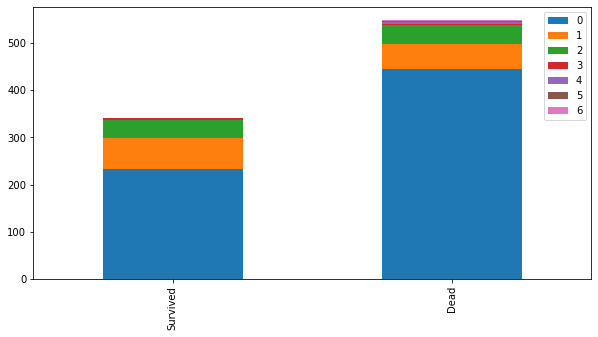

In [11]:
# SibSP
# bar chart

def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
    
bar_chart('SibSp')
bar_chart('Parch')






In [12]:
train_test = [train,test]

In [13]:
for dataset in train_test:
    dataset['Title'] = dataset.Name.str.extract("([A-Za-z]+)\.")
    


In [15]:
for dataset in train_test:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer',                                              'Lady','Major', 'Rev', 'Sir'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')

In [16]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [17]:
for dataset in train_test:
    dataset['Title'] = dataset['Title'].astype(str)

In [18]:
# 성별 스트링 데이터 타입으로 변환
for dataset in train_test:
    dataset['Sex'] = dataset['Sex'].astype(str)

# 엠바크 요소 분포 S가 대부분
# Embarked column에 결측치가 잇서서 이것들을 그냥 S로 넣어주자 (왜냐하면 S 분포가 가장 많으니깐)
for dataset in train_test:
    dataset["Embarked"] = dataset["Embarked"].fillna('S')
    dataset["Embarked"] = dataset["Embarked"].astype(str)
    
## 나이 요소 전처리
## Binning 기법: 데이터에 대해 범위를 지정해주거나 카테고리를 통해 이전보다 작은 수 그룹
for dataset in train_test:
    dataset['Age'].fillna(dataset["Age"].mean(), inplace=True)
    dataset['Age'] = dataset['Age'].astype(int)
    train['Ageband'] = pd.cut(train['Age'],5)
#print(train[['Ageband', 'Survived']].groupby(['Ageband'], as_index = False).mean()) # survived ratio about age band

## binning 기법 써보기
for dataset in train_test:
    dataset.loc[dataset["Age"] <= 15, "Age"] = 0
    dataset.loc[(dataset["Age"]>15) & (dataset["Age"] <= 30), "Age"] = 1
    dataset.loc[(dataset["Age"]>30) & (dataset["Age"] <= 47), "Age"] = 2
    dataset.loc[(dataset["Age"]>47) & (dataset["Age"] <= 65), "Age"] = 3
    dataset.loc[dataset["Age"] > 65, "Age"] = 4
    
    # string type 데이터 아 
    dataset["Age"] = dataset["Age"].map({0:'Child', 1: 'Young', 2:'Middle', 3:'Prime', 4:'Old'}).astype(str)
    
print(train_test)



[     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex     Age  SibSp  \
0                              Braund, Mr. Owen Harris    male   Young      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  Middle      1   
2                               Heikkinen, Miss. Laina  female   Young      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  Middle      1   
4                             Allen, Mr. William Henry    male  Middle      0   
..                                                 ...  

In [19]:
# Fare 요소를 전처리 해보자
# fare column에 눌값이 있는지 확인해보고 있다면 거기에는 각 Pclass에 맞는 평균을 
# 넣어주자 앙기모띠~
print(train[['Pclass','Fare']].groupby(['Pclass'], as_index = False).mean())
print()

mean_fare = train[['Pclass','Fare']].groupby(['Pclass'], as_index = False).mean()

#mean_fare.loc[mean_fare["Pclass"] == 3, "Fare"].item()
fare_Pclass3 =  mean_fare.loc[mean_fare["Pclass"] == 3, "Fare"].values[0]

print(fare_Pclass3)

print(type(train[['Pclass','Fare']].groupby(['Pclass'], as_index = False).mean()))
#train

# 확인을 해보니 152번째 로우에 Fare가 눌값인데 Pclass 3이라서 3의 평균요금을 넣는다
#print(test[test["Fare"].isnull()]["Pclass"])

for dataset in train_test:
    dataset["Fare"] = dataset["Fare"].fillna(fare_Pclass3)
    

for dataset in train_test:
    dataset.loc[ dataset['Fare'] <= 7.854, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 10.5), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 21.679), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 39.688), 'Fare']   = 3
    dataset.loc[ dataset['Fare'] > 39.688, 'Fare'] = 4
    dataset['Fare'] = dataset['Fare'].astype(int)

   Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550

13.675550101832997
<class 'pandas.core.frame.DataFrame'>


In [20]:
print(train_test)

[     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex     Age  SibSp  \
0                              Braund, Mr. Owen Harris    male   Young      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  Middle      1   
2                               Heikkinen, Miss. Laina  female   Young      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  Middle      1   
4                             Allen, Mr. William Henry    male  Middle      0   
..                                                 ...  

In [21]:
#####
# Sibsp & Parch feature(Family)
# 형제자매 파트너 부모님 요소를 그냥 합쳐서 가족 요소로 만들자 
for dataset in train_test:
    dataset["Family"] = dataset["Parch"] + dataset["SibSp"]
    dataset["Family"] = dataset["Family"].astype(int)




In [23]:
### 
# 이제 버릴 요소들은 버리자 
features_drop = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)




KeyError: "['AgeBand'] not found in axis"

In [24]:
train = train.drop(['PassengerId', 'Ageband'], axis=1)

In [25]:
print(train.head())
print(test.head())

   Survived  Pclass     Sex     Age  Fare Embarked Title  Family
0         0       3    male   Young     0        S    Mr       1
1         1       1  female  Middle     4        C   Mrs       1
2         1       3  female   Young     1        S  Miss       0
3         1       1  female  Middle     4        S   Mrs       1
4         0       3    male  Middle     1        S    Mr       0
   PassengerId  Pclass     Sex     Age  Fare Embarked Title  Family
0          892       3    male  Middle     0        Q    Mr       0
1          893       3  female  Middle     0        S   Mrs       1
2          894       2    male   Prime     1        Q    Mr       0
3          895       3    male   Young     1        S    Mr       0
4          896       3  female   Young     2        S   Mrs       2


In [30]:
# one hot encoding categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# Convert categorical variable into dummy/indicator variables.
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [26]:
# 학습시키기전에 주어진 데이터가 정렬 되어있어서 학습에 방해 ?
# survived
train_label = train['Survived']
train_data = train.drop('Survived', axis=1)
test_data = test.drop("PassengerId", axis=1).copy()



In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle



In [42]:
train_data, train_label = shuffle(train_data, train_label, random_state = 5)

In [50]:
def train_and_test(model):
    model.fit(train_data, train_label)
    prediction = model.predict(test_data)
   # accuracy = round(model.score(train_data, train_label) * 100, 2)
   #print("Accuracy : ", accuracy, "%")
    return prediction

In [37]:
print(train_data)
print(test_data)
print(train_label)

     Pclass   Sex     Age  Fare Embarked Title  Family
126       3  male   Young     0        Q    Mr       0
354       3  male   Young     0        C    Mr       0
590       3  male  Middle     0        S    Mr       0
509       3  male   Young     4        S    Mr       0
769       3  male  Middle     1        S    Mr       0
..      ...   ...     ...   ...      ...   ...     ...
400       3  male  Middle     1        S    Mr       0
118       1  male   Young     4        C    Mr       1
701       1  male  Middle     3        S    Mr       0
206       3  male  Middle     2        S    Mr       1
867       1  male  Middle     4        S    Mr       0

[891 rows x 7 columns]
     Pclass     Sex     Age  Fare Embarked   Title  Family
0         3    male  Middle     0        Q      Mr       0
1         3  female  Middle     0        S     Mrs       1
2         2    male   Prime     1        Q      Mr       0
3         3    male   Young     1        S      Mr       0
4         3  female  

In [52]:
import tensorflow as tf

C:\Users\student\Anaconda3\envs\cpu2_env\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\student\Anaconda3\envs\cpu2_env\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\student\Anaconda3\envs\cpu2_env\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\student\Anaconda3\envs\cpu2_env\lib\site-packages

In [53]:
# Logistic Regression
log_pred = train_and_test(LogisticRegression())
# SVM
svm_pred = train_and_test(SVC())
#kNN
knn_pred_4 = train_and_test(KNeighborsClassifier(n_neighbors = 4))
# Random Forest
rf_pred = train_and_test(RandomForestClassifier(n_estimators=100))
# Navie Bayes
nb_pred = train_and_test(GaussianNB())

ValueError: could not convert string to float: 'Mrs'

In [47]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": log_pred})

submission.to_csv('submission_rf.csv', index = False)

NameError: name 'log_pred' is not defined